In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("./sales_data.xlsx")

print(df.head())
print(df.isnull().sum())

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df = df.dropna(subset=['Product', 'Quantity', 'Region'])

print(df.describe())
ps = df.groupby('Product').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()
print(ps)

                  Date    Product  Sales  Quantity Region
0  2023-01-01 00:00:00  Product A    200         4  North
1  2023-02-01 00:00:00  Product B    150         3  South
2  2023-03-01 00:00:00  Product A    220         5  North
3  2023-04-01 00:00:00  Product C    300         6   East
4  2023-05-01 00:00:00  Product B    180         4   West
Date        0
Product     0
Sales       0
Quantity    0
Region      0
dtype: int64
            Sales   Quantity
count   16.000000  16.000000
mean   237.500000   5.375000
std     64.031242   1.746425
min    150.000000   3.000000
25%    187.500000   4.000000
50%    225.000000   5.500000
75%    302.500000   7.000000
max    340.000000   8.000000
     Product  Sales  Quantity
0  Product A   1350        33
1  Product B    850        17
2  Product C   1600        36


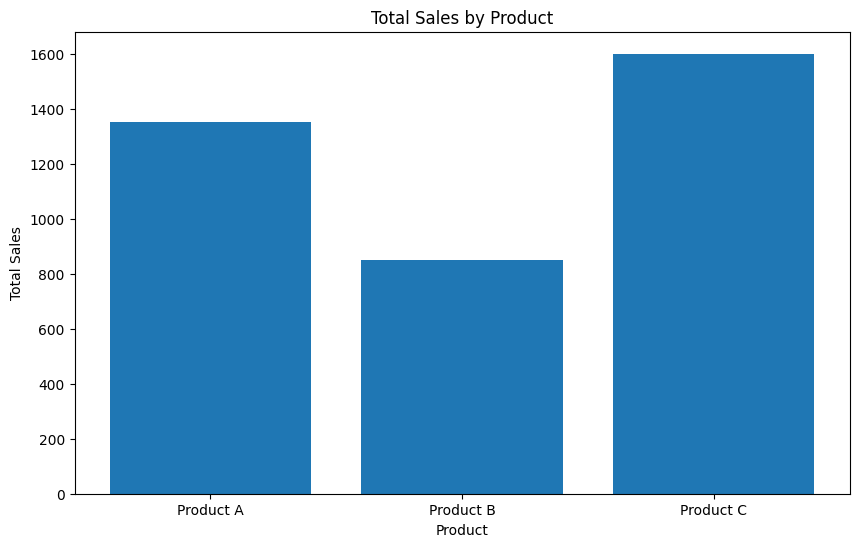

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(ps['Product'], ps["Sales"])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title("Total Sales by Product")
plt.show()

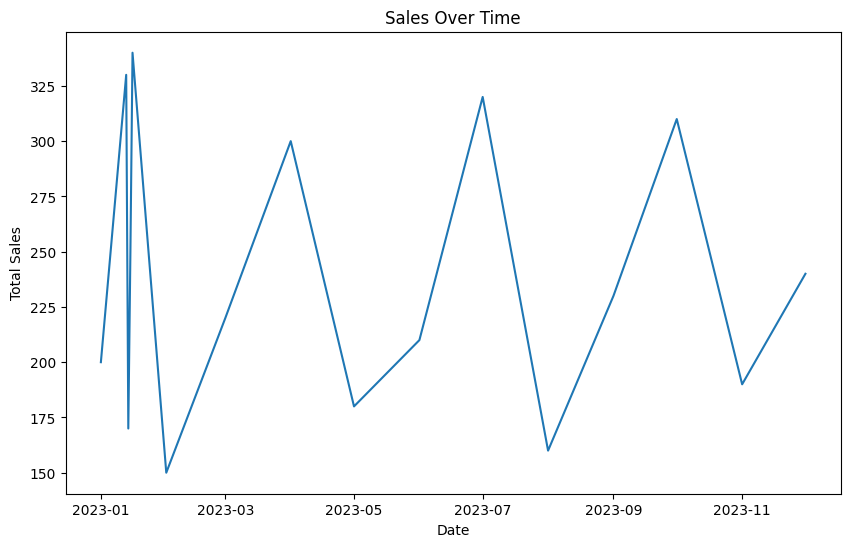

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
sot = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sot['Date'], sot["Sales"])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title("Sales Over Time")
plt.show()

In [27]:
pt = df.pivot_table(values='Sales', index="Region", 
                    columns='Product', aggfunc=np.sum, fill_value=0)
print(pt)

Product  Product A  Product B  Product C
Region                                  
East             0          0       1600
North         1350          0          0
South            0        480          0
West             0        370          0


C:\Users\REC\AppData\Local\Temp\ipykernel_9780\3941940680.py:1: FutureWarning: The provided callable <function sum at 0x000002315F5044A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pt = df.pivot_table(values='Sales', index="Region",


             Sales  Quantity
Sales     1.000000  0.944922
Quantity  0.944922  1.000000


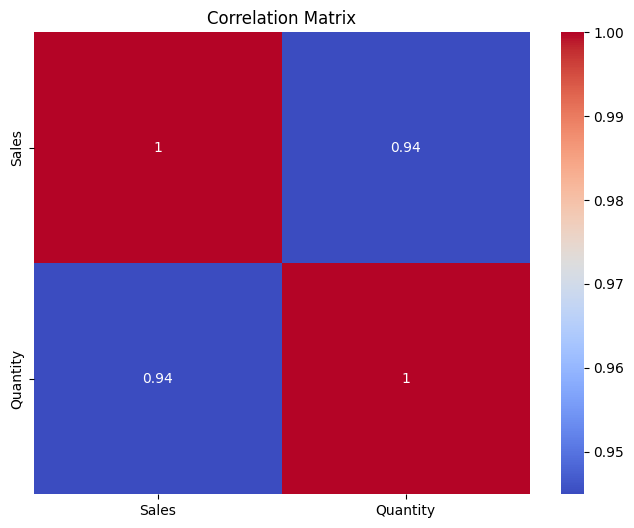

In [53]:
df['Product'] = df['Product'].astype('category').cat.codes
df['Region'] = df['Region'].astype('category').cat.codes
cmat = df.loc[:, "Sales":"Quantity"].corr()
print(cmat)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cmat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()